<a href="https://colab.research.google.com/github/javierjustin13/Calories-Burnt-Prediction-Machine-Learning/blob/main/Calories_Burnt_Prediction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

Data Collection & Processing

In [4]:
!wget https://raw.githubusercontent.com/javierjustin13/Calories-Burnt-Prediction-Machine-Learning/main/calories.csv

--2024-01-26 01:47:49--  https://raw.githubusercontent.com/javierjustin13/Calories-Burnt-Prediction-Machine-Learning/main/calories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230245 (225K) [text/plain]
Saving to: ‘calories.csv’

calories.csv        100%[===================>] 224.85K  --.-KB/s    in 0.02s   

2024-01-26 01:47:49 (13.8 MB/s) - ‘calories.csv’ saved [230245/230245]



In [5]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [6]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
!wget https://raw.githubusercontent.com/javierjustin13/Calories-Burnt-Prediction-Machine-Learning/main/exercise.csv

--2024-01-26 01:47:49--  https://raw.githubusercontent.com/javierjustin13/Calories-Burnt-Prediction-Machine-Learning/main/exercise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553447 (540K) [text/plain]
Saving to: ‘exercise.csv’

exercise.csv        100%[===================>] 540.48K  --.-KB/s    in 0.03s   

2024-01-26 01:47:49 (19.9 MB/s) - ‘exercise.csv’ saved [553447/553447]



In [8]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [9]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,NaN,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [10]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [11]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,NaN,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [13]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      14996 non-null  float64
 4   Weight      14995 non-null  float64
 5   Duration    14978 non-null  float64
 6   Heart_Rate  14848 non-null  float64
 7   Body_Temp   14865 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
# checking for missing values
calories_data.isnull().sum()

User_ID         0
Gender          0
Age             0
Height          4
Weight          5
Duration       22
Heart_Rate    152
Body_Temp     135
Calories        0
dtype: int64

Data Analysis

In [15]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,14996.000000,14995.000000,14978.000000,14848.000000,14865.000000,15000.000000
mean,1.497736e+07,42.789800,174.466858,74.967456,15.536253,95.518588,40.024406,89.539533
std,2.872851e+06,16.980264,14.259507,15.034108,8.318342,9.579102,0.779444,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [16]:
mean_value = calories_data['Height'].mean()
std_dev = calories_data['Height'].std()
threshold = 2  # Adjust this threshold as needed

# Filter out values beyond the threshold
calories_data = calories_data[(calories_data['Height'] >= mean_value - threshold * std_dev) & (calories_data['Height'] <= mean_value + threshold * std_dev)]

In [42]:
calories_data['Duration'] = calories_data.groupby(['Gender'])['Duration'].transform(lambda x: x.fillna(x.mean()))
calories_data['Heart_Rate'] = calories_data.groupby(['Gender'])['Heart_Rate'].transform(lambda x: x.fillna(x.mean()))
calories_data['Body_Temp'] = calories_data.groupby(['Gender'])['Body_Temp'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-42-0ac949e116d3>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  calories_data['Duration'] = calories_data.groupby(['Gender'])['Duration'].apply(lambda x: x.fillna(x.mean()))
<ipython-input-42-0ac949e116d3>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  calories_data['Heart_Rat

In [18]:
# menghapus sisa data yang null
calories_data = calories_data.dropna()

In [19]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14500 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     14500 non-null  int64  
 1   Gender      14500 non-null  object 
 2   Age         14500 non-null  int64  
 3   Height      14500 non-null  float64
 4   Weight      14500 non-null  float64
 5   Duration    14500 non-null  float64
 6   Heart_Rate  14500 non-null  float64
 7   Body_Temp   14500 non-null  float64
 8   Calories    14500 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


1. Positive Correlation
2. Negative Correlation

In [20]:
correlation = calories_data.corr()

<ipython-input-20-65125daba8ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<Axes: >

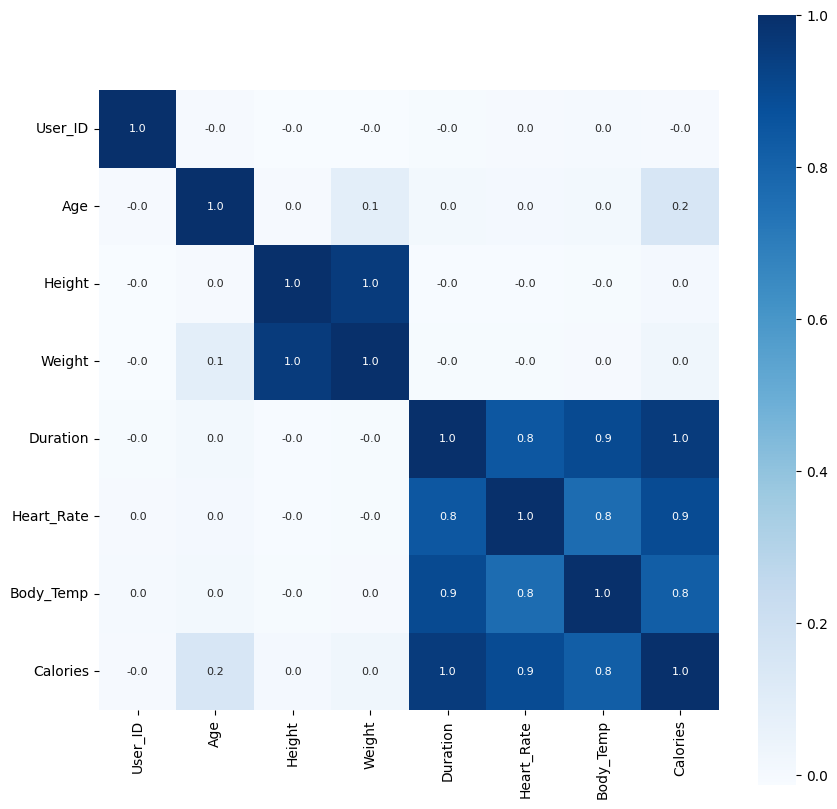

In [21]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [22]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [23]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.000000,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,95.465033,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.000000,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.000000,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.000000,39.8,35.0


Separating features and Target

In [24]:
X = calories_data[['Duration', 'Body_Temp', 'Heart_Rate']]
Y = calories_data['Calories']

In [25]:
print(X)

       Duration  Body_Temp  Heart_Rate
0          29.0       40.8  105.000000
1          14.0       40.3   95.465033
2           5.0       38.7   88.000000
3          13.0       40.5  100.000000
4          10.0       39.8   81.000000
...         ...        ...         ...
14995      11.0       40.4   92.000000
14996       6.0       39.2   85.000000
14997      16.0       40.1   90.000000
14998       2.0       38.3   84.000000
14999      18.0       40.5   92.000000

[14500 rows x 3 columns]


In [26]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 14500, dtype: float64


Splitting the data into training data and Test data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(14500, 3) (11600, 3) (2900, 3)


Model Training

In [29]:
# loading the model
modelXGB = XGBRegressor(n_estimators=200, max_depth=2)
modelGBR = GradientBoostingRegressor(n_estimators=100, max_depth=3)
modelLinear = LinearRegression()

Finding best parameters for XGBoost Regressor using Grid Search

In [30]:
#menentukan nilai parameter untuk dilakukan Cross Validation
parameter = {'max_depth': [2, 3, 4, 5],
             'n_estimators': [50, 100, 150, 200]}

#mencari kombinasi terbaik dari parameter yang telah ditentukan sebelumnya
search = GridSearchCV(modelXGB, parameter, cv=5)
search.fit(X_train, Y_train)

print('Best Result: ', search.best_params_)
print('Best Score : ', search.best_score_)

Best Result:  {'max_depth': 2, 'n_estimators': 200}
Best Score :  0.9606069549084824


Finding best parameters for Gradient Boosting Regressor using Grid Search

In [31]:
parameter = {'max_depth': [2, 3, 4, 5],
             'n_estimators': [50, 100, 150, 200]}

search = GridSearchCV(modelGBR, parameter, cv=5)
search.fit(X_train, Y_train)

print('Best Result: ', search.best_params_) # untuk n_estimators tidak kami ikuti sesuai best score karena menyebabkan overfitting
print('Best Score : ', search.best_score_)

Best Result:  {'max_depth': 3, 'n_estimators': 200}
Best Score :  0.9607144620483151


In [32]:
# training the model with X_train
modelXGB.fit(X_train, Y_train)
modelGBR.fit(X_train, Y_train)
modelLinear.fit(X_train, Y_train)

LinearRegression()

Evaluation

Prediction on Test Data

In [33]:
test_data_predictionXGB = modelXGB.predict(X_test)
train_data_predictionXGB = modelXGB.predict(X_train)

test_data_predictionGBR = modelGBR.predict(X_test)
train_data_predictionGBR = modelGBR.predict(X_train)

test_data_predictionLinear = modelLinear.predict(X_test)
train_data_predictionLinear = modelLinear.predict(X_train)

In [34]:
print(test_data_predictionXGB)
print(test_data_predictionGBR)
print(test_data_predictionLinear)

[ 57.77227  113.68244   58.675945 ...  63.31574  121.264175 167.14594 ]
[ 56.56427562 107.82986304  57.46540347 ...  60.18514621 122.27907494
 166.01240296]
[ 63.66358611 113.04813613  65.77003532 ...  64.85087131 117.64280448
 162.89128826]


Mean Absolute Error

In [35]:
maeXGB = metrics.mean_absolute_error(Y_test, test_data_predictionXGB)
maeGBR = metrics.mean_absolute_error(Y_test, test_data_predictionGBR)
maeLinear = metrics.mean_absolute_error(Y_test, test_data_predictionLinear)

In [36]:
print("MAE XGB = ", maeXGB)
print("MAE GBR = ", maeGBR)
print("MAE Linear = ", maeLinear)

MAE XGB =  8.49431176037624
MAE GBR =  8.53908337585117
MAE Linear =  10.924100199218447


In [37]:
r2scoreXGB_test = metrics.r2_score(Y_test, test_data_predictionXGB)
r2scoreGBR_test = metrics.r2_score(Y_test, test_data_predictionGBR)
r2scoreLinear_test = metrics.r2_score(Y_test, test_data_predictionLinear)

r2scoreXGB_train = metrics.r2_score(Y_train, train_data_predictionXGB)
r2scoreGBR_train = metrics.r2_score(Y_train, train_data_predictionGBR)
r2scoreLinear_train = metrics.r2_score(Y_train, train_data_predictionLinear)

In [38]:
print("R2 Score XGB Test = ", r2scoreXGB_test)
print("R2 Score GBR Test = ", r2scoreGBR_test)
print("R2 Score Linear Test = ", r2scoreLinear_test)
print("")
print("R2 Score XGB Train = ", r2scoreXGB_train)
print("R2 Score GBR Train = ", r2scoreGBR_train)
print("R2 Score Linear Train = ", r2scoreLinear_train)

R2 Score XGB Test =  0.960289522940529
R2 Score GBR Test =  0.9601175702129288
R2 Score Linear Test =  0.941722928875451

R2 Score XGB Train =  0.9630100051031015
R2 Score GBR Train =  0.9628146015428686
R2 Score Linear Train =  0.9453502310314388


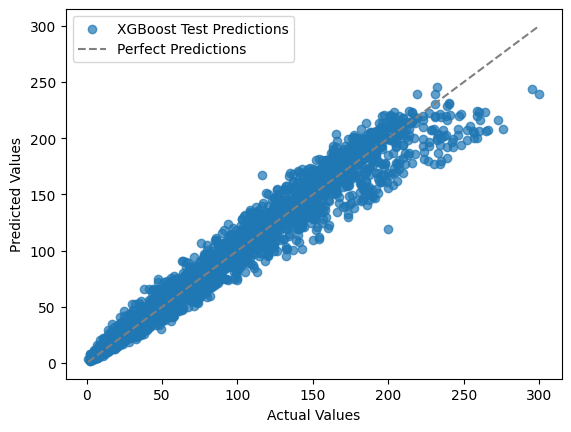

In [39]:
# Scatter plot for XGBoost predictions
plt.scatter(Y_test, test_data_predictionXGB, label='XGBoost Test Predictions', alpha=0.7)

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

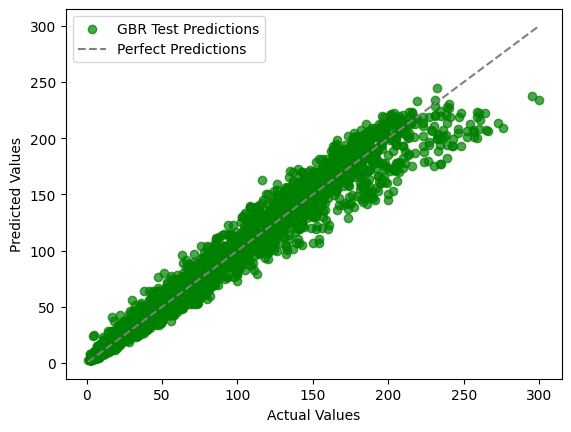

In [40]:
# Scatter plot for Gradient Boosting predictions
plt.scatter(Y_test, test_data_predictionGBR, label='GBR Test Predictions', alpha=0.7, color='green')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

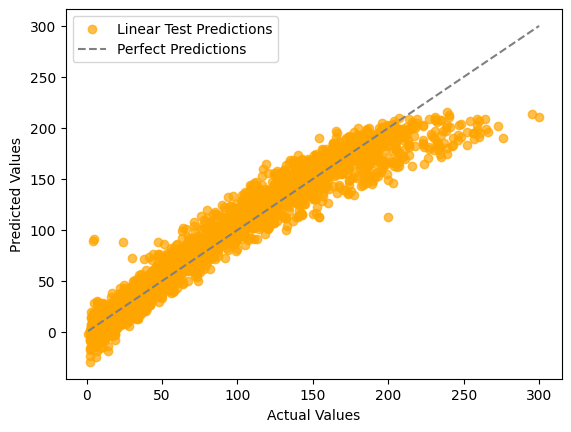

In [41]:
# Scatter plot for Linear Regression predictions
plt.scatter(Y_test, test_data_predictionLinear, label='Linear Test Predictions', alpha=0.7, color='orange')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()